In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train,y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize = (7,1))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y[index]])


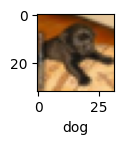

In [ ]:
plot_sample(X_train,y_train,56)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000,)

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')
    ])


# Use sparse_categorical_crossentropy as your output is not one hot encoded
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 161s 103ms/step - loss: 1.6223 - accuracy: 0.4287
Epoch 2/5
1563/1563 [==============================] - 190s 122ms/step - loss: 1.5396 - accuracy: 0.4572
Epoch 3/5
1563/1563 [==============================] - 192s 123ms/step - loss: 1.4812 - accuracy: 0.4770
Epoch 4/5
1563/1563 [==============================] - 177s 113ms/step - loss: 1.4294 - accuracy: 0.4952
Epoch 5/5
1084/1563 [===================>..........] - ETA: 51s - loss: 1.3891 - accuracy: 0.5126

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12230010 (46.65 MB)
Trainable params: 12230010 (46.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Convolutional is detecting the features
cnn = models.Sequential([

        # cnn
        layers.Conv2D(filters = 32, activation = 'relu' ,kernel_size = (3,3),input_shape = (32,32,3)),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(filters = 64, activation = 'relu' ,kernel_size = (3,3)),
        layers.MaxPooling2D(2,2),

        # dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='sigmoid')
    ])


# Use sparse_categorical_crossentropy as your output is ntot one hot encoded
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

In [ ]:
cnn.evaluate(X_test,y_test)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
y_test[:5]

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

In [ ]:
classes[y_classes[3]]